In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
glioma_grading_clinical_and_mutation_features = fetch_ucirepo(id=759) 
  
# data (as pandas dataframes) 
X = glioma_grading_clinical_and_mutation_features.data.features 
y = glioma_grading_clinical_and_mutation_features.data.targets

In [5]:
print(X.head())

   Gender  Age_at_diagnosis   Race  IDH1  TP53  ATRX  PTEN  EGFR  CIC  MUC16  \
0       0             51.30  white     1     0     0     0     0    0      0   
1       0             38.72  white     1     0     0     0     0    1      0   
2       0             35.17  white     1     1     1     0     0    0      0   
3       1             32.78  white     1     1     1     0     0    0      1   
4       0             31.51  white     1     1     1     0     0    0      0   

   ...  FUBP1  RB1  NOTCH1  BCOR  CSMD3  SMARCA4  GRIN2A  IDH2  FAT4  PDGFRA  
0  ...      1    0       0     0      0        0       0     0     0       0  
1  ...      0    0       0     0      0        0       0     0     0       0  
2  ...      0    0       0     0      0        0       0     0     0       0  
3  ...      0    0       0     0      0        0       0     0     1       0  
4  ...      0    0       0     0      0        0       0     0     0       0  

[5 rows x 23 columns]


In [6]:
print(X['Race'].value_counts())

Race
white                               765
black or african american            59
asian                                14
american indian or alaska native      1
Name: count, dtype: int64


In [7]:
X_dummies_race = pd.get_dummies(X['Race'])
X1 = X_dummies_race.astype(int)
X1 = X1.rename_axis('ID')
print(X1.head())

    american indian or alaska native  asian  black or african american  white
ID                                                                           
0                                  0      0                          0      1
1                                  0      0                          0      1
2                                  0      0                          0      1
3                                  0      0                          0      1
4                                  0      0                          0      1


In [8]:
X = X.drop('Race', axis=1)

In [9]:
X = X.rename_axis('ID')
print(X.head())

    Gender  Age_at_diagnosis  IDH1  TP53  ATRX  PTEN  EGFR  CIC  MUC16  \
ID                                                                       
0        0             51.30     1     0     0     0     0    0      0   
1        0             38.72     1     0     0     0     0    1      0   
2        0             35.17     1     1     1     0     0    0      0   
3        1             32.78     1     1     1     0     0    0      1   
4        0             31.51     1     1     1     0     0    0      0   

    PIK3CA  ...  FUBP1  RB1  NOTCH1  BCOR  CSMD3  SMARCA4  GRIN2A  IDH2  FAT4  \
ID          ...                                                                 
0        1  ...      1    0       0     0      0        0       0     0     0   
1        0  ...      0    0       0     0      0        0       0     0     0   
2        0  ...      0    0       0     0      0        0       0     0     0   
3        0  ...      0    0       0     0      0        0       0     0     

In [10]:
X = pd.merge(X, X1, on='ID', how='inner')

In [11]:
print(X.columns)

Index(['Gender', 'Age_at_diagnosis', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR',
       'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1',
       'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA',
       'american indian or alaska native', 'asian',
       'black or african american', 'white'],
      dtype='object')


In [12]:
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [16]:
data_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=26)
components = pca.fit(data_scaled).components_

In [19]:
components_framed = pd.DataFrame(components).transpose()
components_framed.columns = ['comp 1','comp 2', 'comp 3', 'comp 4', 'comp 5', 'comp 6', 'comp 7', 'comp 8', 'comp 9', 'comp 10', 'comp 11', 'comp 12', 'comp 13', 'comp 14', 'comp 15', 'comp 16', 'comp 17', 'comp 18', 'comp 19', 'comp 20', 'comp 21', 'comp 22', 'comp 23', 'comp 24', 'comp 25', 'comp 26']


components_framed.index = X.columns
print(components_framed)

                                    comp 1    comp 2    comp 3    comp 4  \
Gender                           -0.037038  0.032123  0.011878  0.127819   
Age_at_diagnosis                  0.416645  0.073211 -0.032661 -0.138733   
IDH1                             -0.507712  0.021427  0.125298  0.064084   
TP53                             -0.298599 -0.228042 -0.332568  0.223447   
ATRX                             -0.365686 -0.231524 -0.206482  0.227373   
PTEN                              0.299478 -0.024675 -0.166158  0.005612   
EGFR                              0.287012  0.009518 -0.108200  0.047486   
CIC                              -0.116990  0.387363  0.385344  0.046605   
MUC16                             0.094700  0.020240 -0.098533  0.229094   
PIK3CA                            0.051535  0.129711  0.118747  0.125045   
NF1                               0.151433  0.093117 -0.044342  0.124189   
PIK3R1                            0.078279  0.065509  0.069868  0.124412   
FUBP1       

In [20]:
var_ratio = pca.explained_variance_ratio_
var_ratio = pd.DataFrame(var_ratio).transpose()
var_ratio.columns = ['comp 1','comp 2', 'comp 3', 'comp 4', 'comp 5', 'comp 6', 'comp 7', 'comp 8', 'comp 9', 'comp 10', 'comp 11', 'comp 12', 'comp 13', 'comp 14', 'comp 15', 'comp 16', 'comp 17', 'comp 18', 'comp 19', 'comp 20', 'comp 21', 'comp 22', 'comp 23', 'comp 24', 'comp 25', 'comp 26']
var_ratio.index = ['Proportion of Variance']
print(var_ratio)

                          comp 1    comp 2    comp 3    comp 4    comp 5  \
Proportion of Variance  0.110347  0.078834  0.075677  0.065403  0.045067   

                          comp 6    comp 7    comp 8   comp 9   comp 10  ...  \
Proportion of Variance  0.044666  0.043595  0.041479  0.04008  0.038825  ...   

                         comp 17   comp 18   comp 19   comp 20   comp 21  \
Proportion of Variance  0.030613  0.030428  0.029023  0.025827  0.024628   

                         comp 22   comp 23   comp 24   comp 25       comp 26  
Proportion of Variance  0.022607  0.017538  0.015241  0.008318  2.176219e-32  

[1 rows x 26 columns]


In [23]:
x = range(1, len(var_ratio.columns) + 1)
y = var_ratio.iloc[0].tolist()

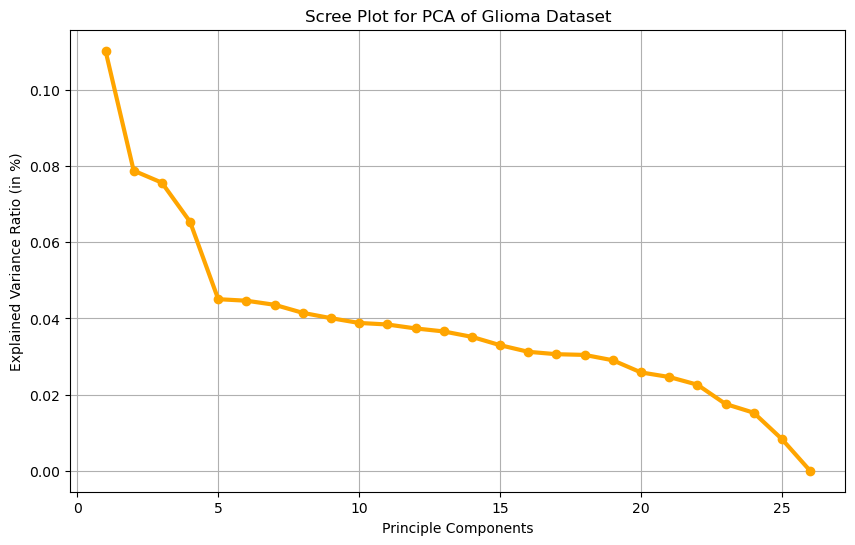

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(x, y, marker='o', linewidth=3, color="orange")
plt.title("Scree Plot for PCA of Glioma Dataset")
plt.xlabel("Principle Components")
plt.ylabel("Explained Variance Ratio (in %)")
#plt.xticks(x)
plt.grid(True)
plt.show()

In [ ]:
#volcano plot